In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import pickle

In [3]:
merge = pd.read_csv('/content/drive/MyDrive/집교 2_Team P/merged_last.csv')

In [4]:
merge.shape

(4654011, 12)

In [5]:
merge.head()

,Unnamed: 0,artist_id,artist_name,track_id,track_name,text,user_id,album_id,listen_count,listen_count_bin,tags,i
0,0,1,Megadeth,2,Hangar 18,Welcome to our fortress tall \nTake some time...,21072247,2,9,9,"{'thrash metal': 100, 'metal': 46, 'heavy meta...",17680134
1,1,1,Megadeth,2,Hangar 18,Welcome to our fortress tall \nTake some time...,32226961,2,14,10~2704,"{'thrash metal': 100, 'metal': 46, 'heavy meta...",17680134
2,2,1,Megadeth,2,Hangar 18,Welcome to our fortress tall \nTake some time...,2115525,2,16,10~2704,"{'thrash metal': 100, 'metal': 46, 'heavy meta...",17680134
3,3,1,Megadeth,2,Hangar 18,Welcome to our fortress tall \nTake some time...,4812967,2113,4,4,"{'thrash metal': 100, 'metal': 46, 'heavy meta...",17680134
4,4,1,Megadeth,2,Hangar 18,Welcome to our fortress tall \nTake some time...,21211675,2,1,1,"{'thrash metal': 100, 'metal': 46, 'heavy meta...",17680134


In [7]:
merge.drop_duplicates(subset=['track_id'],inplace=True)
merge.head()

,Unnamed: 0,artist_id,artist_name,track_id,track_name,text,user_id,album_id,listen_count,listen_count_bin,tags,i
0,0,1,Megadeth,2,Hangar 18,Welcome to our fortress tall \nTake some time...,21072247,2,9,9,"{'thrash metal': 100, 'metal': 46, 'heavy meta...",17680134
1372,1372,1,Megadeth,8,Tornado Of Souls,This morning I made the call \nThe one that e...,21072247,2,41,10~2704,"{'thrash metal': 100, 'metal': 42, 'heavy meta...",41846311
2453,2453,1,Megadeth,1524,Captive Honour,"Madness comes, and madness goes \nAn insane p...",21072247,693,14,10~2704,"{'thrash metal': 100, 'heavy metal': 62, 'meta...",8598232
2974,2974,1,Megadeth,1785,Reckoning Day,I like the way that I make you itch \nAnd all...,21072247,821,8,8,"{'thrash metal': 100, 'heavy metal': 70, 'meta...",32827650
3527,3527,1,Megadeth,1787,Family Tree,Forgotten things remembered \nThe tigers eat ...,21072247,822,11,10~2704,"{'heavy metal': 100, 'thrash metal': 100, 'met...",14713869


In [8]:
merge.drop(columns=['Unnamed: 0','listen_count_bin','tags','i',], inplace=True)
merge.head()

,artist_id,artist_name,track_id,track_name,text,user_id,album_id,listen_count
0,1,Megadeth,2,Hangar 18,Welcome to our fortress tall \nTake some time...,21072247,2,9
1372,1,Megadeth,8,Tornado Of Souls,This morning I made the call \nThe one that e...,21072247,2,41
2453,1,Megadeth,1524,Captive Honour,"Madness comes, and madness goes \nAn insane p...",21072247,693,14
2974,1,Megadeth,1785,Reckoning Day,I like the way that I make you itch \nAnd all...,21072247,821,8
3527,1,Megadeth,1787,Family Tree,Forgotten things remembered \nThe tigers eat ...,21072247,822,11


In [9]:
merge.drop(columns=['artist_id','artist_name','album_id'], inplace=True)
merge.head()

,track_id,track_name,text,user_id,listen_count
0,2,Hangar 18,Welcome to our fortress tall \nTake some time...,21072247,9
1372,8,Tornado Of Souls,This morning I made the call \nThe one that e...,21072247,41
2453,1524,Captive Honour,"Madness comes, and madness goes \nAn insane p...",21072247,14
2974,1785,Reckoning Day,I like the way that I make you itch \nAnd all...,21072247,8
3527,1787,Family Tree,Forgotten things remembered \nThe tigers eat ...,21072247,11


In [10]:
merge.columns=['track_id','track_name','lyrics','user_id','listen_count']
merge.head()

,track_id,track_name,lyrics,user_id,listen_count
0,2,Hangar 18,Welcome to our fortress tall \nTake some time...,21072247,9
1372,8,Tornado Of Souls,This morning I made the call \nThe one that e...,21072247,41
2453,1524,Captive Honour,"Madness comes, and madness goes \nAn insane p...",21072247,14
2974,1785,Reckoning Day,I like the way that I make you itch \nAnd all...,21072247,8
3527,1787,Family Tree,Forgotten things remembered \nThe tigers eat ...,21072247,11


In [12]:
bins = [0,1,3,5,7,100000]#20,30,40,50,60,70,80,90,100,1000]
labels = [1,2,3,4,5]#'20','30','40','50','60','70','80','90','100','1000']

merge['listen_count_bin'] = pd.cut(merge['listen_count'], bins=bins, labels=labels)
merge.head()

,track_id,track_name,lyrics,user_id,listen_count,listen_count_bin
0,2,Hangar 18,Welcome to our fortress tall \nTake some time...,21072247,9,5
1372,8,Tornado Of Souls,This morning I made the call \nThe one that e...,21072247,41,5
2453,1524,Captive Honour,"Madness comes, and madness goes \nAn insane p...",21072247,14,5
2974,1785,Reckoning Day,I like the way that I make you itch \nAnd all...,21072247,8,5
3527,1787,Family Tree,Forgotten things remembered \nThe tigers eat ...,21072247,11,5


In [14]:
merge.columns=['track_id','track_name','lyrics','user_id','listen_count','rating']
merge.head(10)

,track_id,track_name,lyrics,user_id,listen_count,rating
0,2,Hangar 18,Welcome to our fortress tall \nTake some time...,21072247,9,5
1372,8,Tornado Of Souls,This morning I made the call \nThe one that e...,21072247,41,5
2453,1524,Captive Honour,"Madness comes, and madness goes \nAn insane p...",21072247,14,5
2974,1785,Reckoning Day,I like the way that I make you itch \nAnd all...,21072247,8,5
3527,1787,Family Tree,Forgotten things remembered \nThe tigers eat ...,21072247,11,5
3970,2223,Go To Hell,Now I lay me down to sleep \nI pray the Lord ...,21072247,15,5
4275,2224,Skin O' My Teeth,I had wrists donning slits \nFlowing constant...,21072247,3,2
5160,2225,Paranoid,Finished with my woman 'cause she couldn't hel...,21072247,7,4
5632,2379,Holy Wars...The Punishment Due,Brother will kill brother \nSpilling blood ac...,21072247,27,5
6479,2404,Dawn Patrol,Thermal count is rising in perpetual writhing ...,21072247,4,3


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/집교 2_Team P/user-track-listen_count.csv')

In [ ]:
df.loc[df['listen_count_bin'] == '10~2704', 'listen_count_bin'] = 10
df['listen_count_bin'] = df['listen_count_bin'].astype(int)

In [ ]:
df.shape

(4654011, 4)

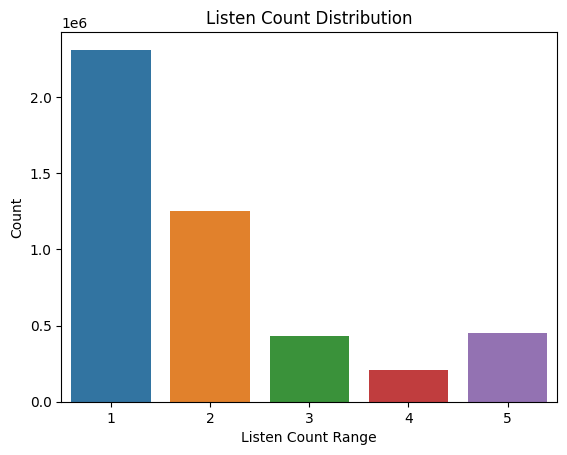

In [ ]:
# listen_count 기준으로 나누어서 시각화
bins = [0,1,3,5,7,11]#20,30,40,50,60,70,80,90,100,1000]
labels = [1,2,3,4,5]#'20','30','40','50','60','70','80','90','100','1000']

df['listen_count_bin'] = pd.cut(df['listen_count_bin'], bins=bins, labels=labels)

# seaborn을 사용하여 시각화
sns.countplot(x='listen_count_bin', data=df)
plt.title('Listen Count Distribution')
plt.xlabel('Listen Count Range')
plt.ylabel('Count')
plt.show()

In [ ]:
user_rating_counts = df.groupby('user_id')['listen_count_bin'].count()

print(user_rating_counts)

user_id
3653        140
5069        147
6958        305
10879       143
11297       123
           ... 
50069303     18
50080783      3
50083349      6
50085163     19
50085736      6
Name: listen_count_bin, Length: 24458, dtype: int64


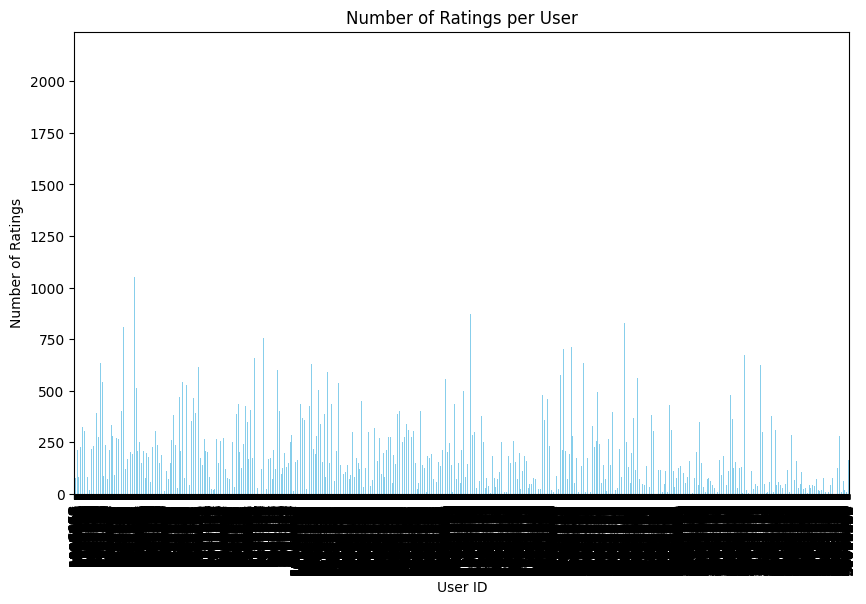

In [ ]:
plt.figure(figsize=(10, 6))
user_rating_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Ratings per User')
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.show()

In [ ]:
users_with_less_than_5_ratings = df.groupby('user_id').filter(lambda x: x['listen_count_bin'].count() < 5)['user_id'].nunique()
users_with_less_than_10_ratings = df.groupby('user_id').filter(lambda x: x['listen_count_bin'].count() < 10)['user_id'].nunique()
print(f"Users with less than 5 ratings: {users_with_less_than_5_ratings}")
print(f"Users with less than 10 ratings: {users_with_less_than_10_ratings}")

Users with less than 5 ratings: 697
Users with less than 10 ratings: 1404


In [ ]:
track_with_less_than_5_ratings = df.groupby('track_id').filter(lambda x: x['listen_count_bin'].count() < 5)['track_id'].nunique()
track_with_less_than_10_ratings = df.groupby('track_id').filter(lambda x: x['listen_count_bin'].count() < 10)['track_id'].nunique()
print(f"track with less than 5 ratings: {track_with_less_than_5_ratings}")
print(f"track with less than 10 ratings: {track_with_less_than_10_ratings}")

track with less than 5 ratings: 2730
track with less than 10 ratings: 6406


In [ ]:
filtered_df = df.groupby('user_id').filter(lambda x: x['listen_count_bin'].count() >= 10)
filtered_df = filtered_df.groupby('track_id').filter(lambda x: x['listen_count_bin'].count() >= 10)

print("Filtered DataFrame:")
print(filtered_df)

Filtered DataFrame:
         Unnamed: 0   user_id  track_id listen_count_bin
0                 0  21072247         2                5
1                 1  32226961         2                5
2                 2   2115525         2                5
3                 3   4812967         2                3
4                 4  21211675         2                1
...             ...       ...       ...              ...
4653993     4653993   6607122  10615851                1
4653994     4653994   9084299  10615851                1
4653995     4653995  38482570  10615851                3
4653996     4653996  12511195  10615851                1
4653997     4653997  25612264  10615851                1

[4614908 rows x 4 columns]


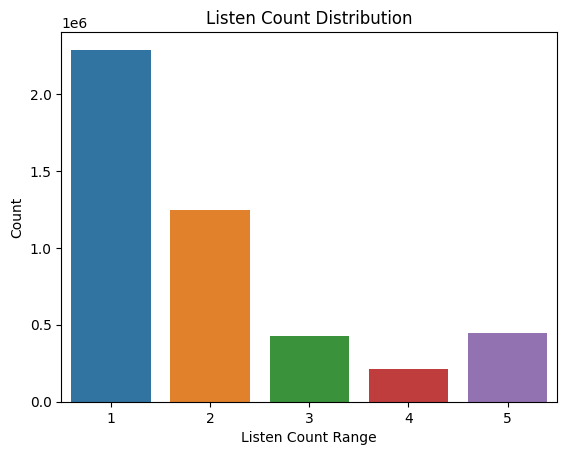

In [ ]:
# seaborn을 사용하여 시각화
sns.countplot(x='listen_count_bin', data=filtered_df)
plt.title('Listen Count Distribution')
plt.xlabel('Listen Count Range')
plt.ylabel('Count')
plt.show()

In [ ]:
filtered_df.drop(columns=['Unnamed: 0'], inplace=True)
filtered_df.head()

,user_id,track_id,listen_count_bin
0,21072247,2,5
1,32226961,2,5
2,2115525,2,5
3,4812967,2,3
4,21211675,2,1


In [ ]:
filtered_df.to_csv('/content/drive/MyDrive/집교 2_Team P/user-track-listen_count_filtered10.csv')